## Homework 3
*For any questions or concerns please email your instructor at `smanna@scu.edu`*
### Due - 02/22/2020 - 11:59p - 50 points

**Name:** `<Jeffrey Lin>`

**Email** `<jlin7@scu.edu>`

**Objectives:** The aim of this homework is to warm you up with basic linear regression concept. You have to implement univariate linear regression by using `scikit-learn`.

**Problem Statement:** Imagine you are the CEO of the chain store and trying to figure out the potential cities to open new stores. Looking at the operating revenue, you noticed that the profits of each chain store seem to have correlation with the city’s population of the store. For this problem, you will need to develop linear regression with one variable to predict profits for a chain store. The data file contains only two columns: the first column is the population of a city and the second column is the profit of a chain store in that city. A negative value for profit indicates a loss. 
*The task is the prediction of profit for the potential cities based their populations.*

**Submission Instructions:** 
* Please download `hw3.ipynb`, `eval.csv`, and `test.csv` files and insert cells in the `hw3.ipynb` to complete your homework and submit the same file to Camino under `Homework` $\rightarrow$ `hw3`. Please feel free to use the `w5-LinearRegression-cricketChirps.ipynb` as a reference to work on this homework.

**Honor Code:** You are expected to complete the homework on your own. Solutions might exist elsewhere, but you are not allowed to copy them. 

** Predicting using sci-kit learn's linear model**

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

In [2]:
# Reading data
df = pd.read_csv('eval.txt')

In [3]:
# display fist few rows of the data set
# TODO
df.head()

,0,10.0626
0,0.1,38.6784
1,0.2,20.6649
2,0.3,51.9358
3,0.4,41.2496
4,0.5,36.4929


In [4]:
# adding column names
# done to make the data more readable
# TODO
df.columns = ['Population','Profit']
df.head()

,Population,Profit
0,0.1,38.6784
1,0.2,20.6649
2,0.3,51.9358
3,0.4,41.2496
4,0.5,36.4929


In [5]:
# Looking at statistics of the data
# TODO
df.describe()

,Population,Profit
count,99.000000,99.000000
mean,5.000000,59.989072
std,2.872281,20.654898
min,0.100000,18.249200
25%,2.550000,44.453850
50%,5.000000,58.445900
75%,7.450000,77.396050
max,9.900000,104.998000


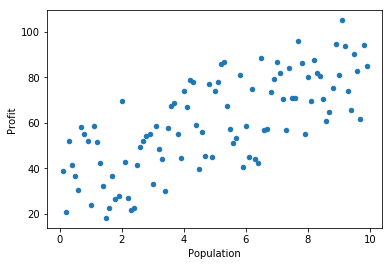

In [6]:
# visualizing the data - use an appropriate illustration
# TODO
df.plot(kind='scatter', x='Population', y='Profit');

In [7]:
# Estimate Mean of the attribute 'profit'
# TODO
df['Profit'].mean()

59.98907171717172

In [8]:
import sklearn.linear_model as lm

In [9]:
# instantiate - Linear Regression
# TODO
regr = lm.LinearRegression()

In [10]:
# fit the data 
# TODO
X = df['Population']
X = X.to_frame()
y = df['Profit']
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# print the coefficients
# TODO
print('Coefficients:', regr.coef_)
print('Intercepts:', regr.intercept_)

('Coefficients:', array([5.20571086]))
('Intercepts:', 33.96051741908885)


Now instead of predicting a single value, you have to do it for few values provided in the file `test.csv`.

In [12]:
# Read test data for predictions
df_test = pd.read_csv('test.txt')
# adding column names
# done to make the data more readable
# TODO
df_test.columns = ['Population','Profit']

In [13]:
# printing first five rows
# TODO
df_test.head(5)

,Population,Profit
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [14]:
# feel free to insert more cells as you need

In [15]:
# actual output
# y
# TODO
df_test['Profit'].head(5)

0     9.1302
1    13.6620
2    11.8540
3     6.8233
4    11.8860
Name: Profit, dtype: float64

In [16]:
# predictions by using the formula: y_cap = theta_0 + theta_1 * x
# TODO
regr.intercept_ + (regr.coef_ * df_test['Population'][0])

array([62.73612534])

In [17]:
# using sci-kit learn linear model 
# TODO
regr.predict(np.array(df_test['Population'][0]).reshape(1,-1))

array([62.73612534])

Make sure, you follow the steps as shown in class. Only for prediction, instead of using a single value, you have to use `test.txt` 

In [18]:
# predict the profits using your `test.csv`
# TODO
def calculatePrediction(row):
    return regr.intercept_ + (regr.coef_ * row['Population'])

df_test['Prediction'] = df_test.apply(calculatePrediction, axis=1)
df_test.head(10)

,Population,Profit,Prediction
0,5.5277,9.1302,[62.73612533779139]
1,8.5186,13.6620,[78.3058859478186]
2,7.0032,11.8540,[70.41715171115564]
3,5.8598,6.8233,[64.46494191427006]
4,8.3829,11.8860,[77.59947098416862]
5,7.4764,4.3483,[72.8804940899262]
6,8.5781,12.0000,[78.61562574396578]
7,6.4862,6.5987,[67.72579919673387]
8,5.0546,3.8166,[60.27330353010679]
9,5.7107,3.2522,[63.688770425101225]


In [19]:
# MSE
# for this you have to use "from sklearn.metrics import mean_squared_error"
# Read the manual
# TODO
mean_squared_error(df_test['Profit'], df_test['Prediction'])

5262.137623243264